In [2]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
import math
from sklearn import metrics
from catboost import CatBoostClassifier

In [3]:
!pip install catboost

In [4]:
df = pd.read_csv('Customertravel.csv')

In [5]:
df.shape

(954, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


In [7]:
df.head(5)

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [8]:
# Check whether there is null data
df.isnull().sum()

Age                           0
FrequentFlyer                 0
AnnualIncomeClass             0
ServicesOpted                 0
AccountSyncedToSocialMedia    0
BookedHotelOrNot              0
Target                        0
dtype: int64

In [9]:
df.describe()

,Age,ServicesOpted,Target
count,954.000000,954.000000,954.000000
mean,32.109015,2.437107,0.234801
std,3.337388,1.606233,0.424097
min,27.000000,1.000000,0.000000
25%,30.000000,1.000000,0.000000
50%,31.000000,2.000000,0.000000
75%,35.000000,4.000000,0.000000
max,38.000000,6.000000,1.000000


In [13]:
df_churn.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,0,2,6,0,1,0
1,34,2,1,5,1,0,1
2,37,0,2,3,1,0,0
3,30,0,2,2,0,0,0
4,30,0,1,1,0,0,0


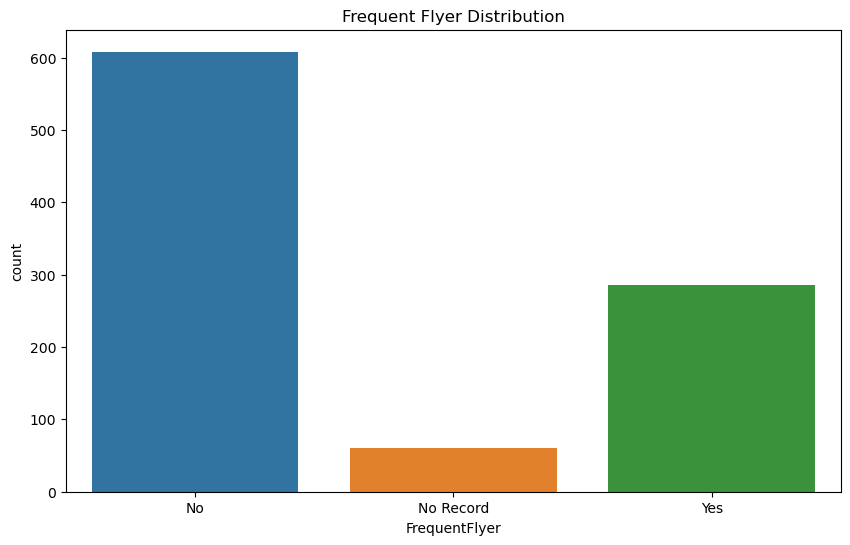

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(x='FrequentFlyer', data=df)
plt.title('Frequent Flyer Distribution')
plt.show()

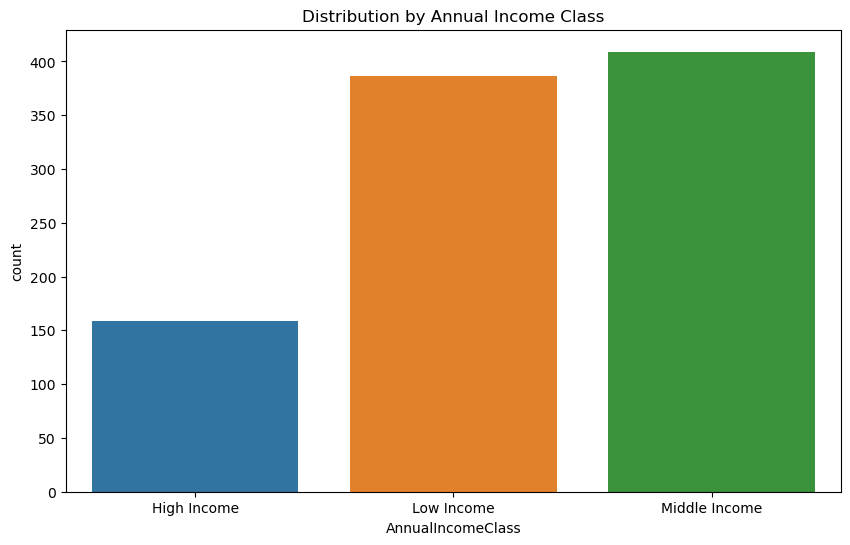

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(x='AnnualIncomeClass', data=df)
plt.title('Distribution by Annual Income Class')
plt.show()

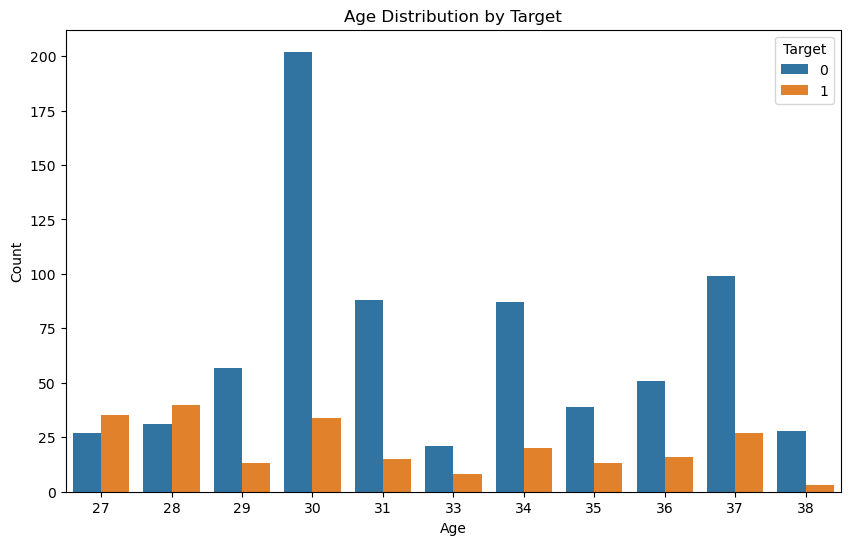

In [28]:
# Distribution of age feature using countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='Age', hue='Target', data=df)
plt.title('Age Distribution by Target')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Target')
plt.show()

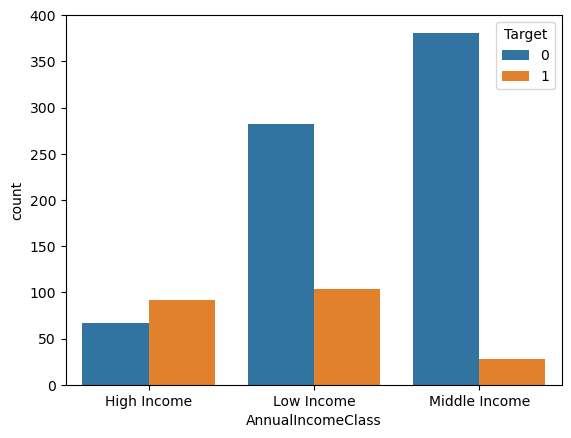

In [27]:
# count plot on two categorical variable
sns.countplot(x ='AnnualIncomeClass', hue = "Target", data = df)
 
# Show the plot
plt.show()

## Pre-processing Data

In [33]:
#transform categorical variable
df['FrequentFlyer'] = df['FrequentFlyer'].astype('category')
df['AnnualIncomeClass'] = df['AnnualIncomeClass'].astype('category')
df['AccountSyncedToSocialMedia'] = df['AccountSyncedToSocialMedia'].astype('category')
df['BookedHotelOrNot'] = df['BookedHotelOrNot'].astype('category')
print(df.dtypes)

Age                              int64
FrequentFlyer                 category
AnnualIncomeClass             category
ServicesOpted                    int64
AccountSyncedToSocialMedia    category
BookedHotelOrNot              category
Target                           int64
dtype: object


In [38]:
#handling categorical data
df_churn = pd.DataFrame(df)
df_churn['FrequentFlyer'] = df_churn['FrequentFlyer'].cat.codes
df_churn['AnnualIncomeClass'] = df_churn['AnnualIncomeClass'].cat.codes
df_churn['AccountSyncedToSocialMedia'] = df_churn['AccountSyncedToSocialMedia'].cat.codes
df_churn['BookedHotelOrNot'] = df_churn['BookedHotelOrNot'].cat.codes

In [37]:
df_churn.head(5)

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,0,2,6,0,1,0
1,34,2,1,5,1,0,1
2,37,0,2,3,1,0,0
3,30,0,2,2,0,0,0
4,30,0,1,1,0,0,0


                                 Age  FrequentFlyer  AnnualIncomeClass  \
Age                         1.000000       0.034671           0.053149   
FrequentFlyer               0.034671       1.000000          -0.709380   
AnnualIncomeClass           0.053149      -0.709380           1.000000   
ServicesOpted              -0.012422      -0.164981           0.236364   
AccountSyncedToSocialMedia -0.016367      -0.084590           0.034744   
BookedHotelOrNot            0.024281      -0.189947           0.250833   
Target                     -0.131534       0.418672          -0.418092   

                            ServicesOpted  AccountSyncedToSocialMedia  \
Age                             -0.012422                   -0.016367   
FrequentFlyer                   -0.164981                   -0.084590   
AnnualIncomeClass                0.236364                    0.034744   
ServicesOpted                    1.000000                   -0.148655   
AccountSyncedToSocialMedia      -0.148655 

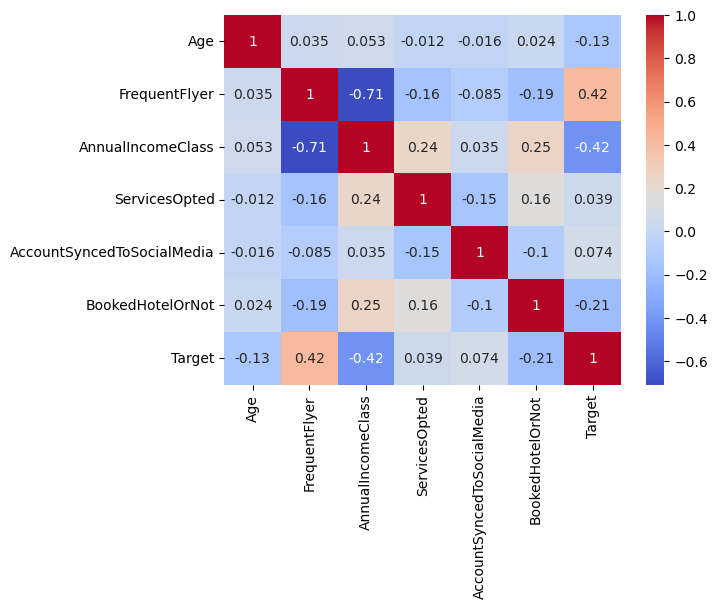

In [35]:
# Creating the correlation matrix dataset
df_churn_matrix = df_churn.corr()
print(df_churn_matrix)

# Create the heatmap using the `heatmap` function of Seaborn
sns.heatmap(df_churn_matrix, cmap='coolwarm', annot=True)

# Display the heatmap using the `show` method of the `pyplot` module from matplotlib.
plt.show()

FrequentFlyer and AnnualIncomeClass have a strong negative correlation (-0.709380), confirming the potential multicollinearity 

Target variable has moderate positive correlations with FrequentFlyer (0.418672) and AccountsSyncedToSocialMedia (0.073831), and moderate negative correlations with AnnualIncomeClass (-0.418092) and BookedHotelOrNot (-0.206055). These variables are likely to be important predictors of customer churn.

Age has weak correlations with all other variables, with the strongest being a negative correlation with the Target variable (-0.131534). This suggests that Age might not be a significant predictor of churn.

ServicesOpted has relatively weak correlations with the Target variable (0.038646) and other predictors, indicating it may not contribute much to the predictive model.